In [1]:
import numpy
import netCDF4
import matplotlib
import matplotlib.pyplot as mp
import datetime
import matplotlib.colors
import scipy.stats

import matplotlib.ticker
import cartopy.mpl.gridliner #import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import mpl_toolkits
import cartopy

DEGREE_SIGN = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})

% matplotlib inline

In [2]:
run_info = 'FMAASO'
skip_time=0

# GEO EM FILE

In [3]:
geo_em_ncfile = netCDF4.Dataset('/Users/baird/Dropbox/_data_WRF/geo_em.d01_amazon_50km.nc')
HGT_M = geo_em_ncfile.variables['HGT_M'][0,:,:]

# time, LAT, LON ncfiles

In [4]:
xlat_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLAT.nc'
xlong_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_XLONG.nc'
landmask_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_LANDMASK.nc'
times_ncfile_name = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_Times_ens_mean.nc'

# import FMAASO 400 data

In [5]:
data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/400/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = netCDF4.Dataset(times_ncfile_name)
xlat_ncfile = netCDF4.Dataset(xlat_ncfile_name)
xlong_ncfile = netCDF4.Dataset(xlong_ncfile_name)
landmask_ncfile = netCDF4.Dataset(landmask_ncfile_name)

qvapor_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'QVAPOR' + '_ens_mean_vinterp_zcoords.nc')
u_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'U' + '_ens_mean_vinterp_zcoords.nc')
v_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'V' + '_ens_mean_vinterp_zcoords.nc')
w_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'W' + '_ens_mean_vinterp_zcoords.nc')

# qvapor_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'QVAPOR' + '_ens_mean_vinterp.nc')
# u_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'U' + '_ens_mean_vinterp.nc')
# v_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'V' + '_ens_mean_vinterp.nc')
# w_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'W' + '_ens_mean_vinterp.nc')

In [6]:
time_var = time_ncfile.variables['Times']
time = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

z = qvapor_ncfile.variables['z'][:]
qvapor_400 = qvapor_ncfile.variables['QVAPOR'][:] * 1000.
w_400 = w_ncfile.variables['W'][:]

/Users/baird/anaconda/lib/python3.6/site-packages/numpy/ma/core.py:1016: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


# import FMAASO 1000 data

In [7]:
data_dir = '/Users/baird/Dropbox/_data_WRF/CHEYENNE/FMAASO/1000/concat_nc_files/'
filename_prefix = 'wrfout_d01_1979-01-01_00:00:00_1979-01-11_00:00:00_'
filename_suffix = '_ens_mean.nc'

time_ncfile = netCDF4.Dataset(times_ncfile_name)
xlat_ncfile = netCDF4.Dataset(xlat_ncfile_name)
xlong_ncfile = netCDF4.Dataset(xlong_ncfile_name)
landmask_ncfile = netCDF4.Dataset(landmask_ncfile_name)

qvapor_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'QVAPOR' + '_ens_mean_vinterp_zcoords.nc')
u_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'U' + '_ens_mean_vinterp_zcoords.nc')
v_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'V' + '_ens_mean_vinterp_zcoords.nc')
w_ncfile = netCDF4.Dataset(data_dir + filename_prefix + 'W' + '_ens_mean_vinterp_zcoords.nc')

In [8]:
time_var_1000 = time_ncfile.variables['Times']
time_1000 = time_ncfile.variables['Times'][:]
xlat = xlat_ncfile.variables['XLAT'][0,:,:]
xlong = xlong_ncfile.variables['XLONG'][0,:,:]
landmask = landmask_ncfile.variables['LANDMASK'][0,:,:]

qvapor_1000 = qvapor_ncfile.variables['QVAPOR'][:] * 1000.
w_1000 = w_ncfile.variables['W'][:]

/Users/baird/anaconda/lib/python3.6/site-packages/numpy/ma/core.py:1016: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


# get time stamps

In [9]:
time_datetimes = numpy.zeros(time.shape[0], dtype=object)
for t in range(time.shape[0]):
    time_string = ''.join([i.decode('utf-8') for i in time[t,:]])
    year,month,day = time_string.split('_')[0].split('-')
    hour,minute,second = time_string.split('_')[1].split(':')
    time_datetimes[t] = datetime.datetime(int(year),int(month),int(day),int(hour),int(second),int(minute))

In [10]:
# SET ALL OCEAN GRID POINTS EQUAL TO NAN
qvapor_400_landmask = numpy.copy(qvapor_400)
qvapor_400_landmask[:,:,landmask==0] = numpy.nan

qvapor_1000_landmask = numpy.copy(qvapor_1000)
qvapor_1000_landmask[:,:,landmask==0] = numpy.nan

w_400_landmask = numpy.copy(w_400)
w_400_landmask[:,:,landmask==0] = numpy.nan

w_1000_landmask = numpy.copy(w_1000)
w_1000_landmask[:,:,landmask==0] = numpy.nan

threshold = 9.96921e+36

w_400_landmask[w_400_landmask==threshold] = numpy.nan
w_1000_landmask[w_1000_landmask==threshold] = numpy.nan
qvapor_400_landmask[qvapor_400_landmask==threshold] = numpy.nan
qvapor_1000_landmask[qvapor_1000_landmask==threshold] = numpy.nan


In [38]:
################################################################################
################################################################################
# CALCULATE DIFFERENCES, FORCE TO BE LAND ONLY GRID POINTS

# PULL OUT LONGITUDINAL AND LATITUDINAL RANGE
lon_hi = -35.
lon_lo = -75.
lat_lo = -10.
lat_hi = 10.

xlat_indices = numpy.array((xlat>=lat_lo) & (xlat<=lat_hi), dtype=bool)
xlong_indices = numpy.array((xlong>=lon_lo) & (xlong<=lon_hi), dtype=bool)
xlat_subset = xlat[xlat_indices[:,0],:]
xlat_subset = xlat_subset[:,xlong_indices[0,:]]
xlong_subset = xlong[xlat_indices[:,0],:]
xlong_subset = xlong_subset[:,xlong_indices[0,:]]

# QVAPOR DIFFERENCES
print("differences")
qvapor_landmask_diffs = qvapor_1000_landmask[:,:,:,:] - qvapor_400_landmask[:,:,:,:]
w_landmask_diffs = w_1000[:,:,:,:] - w_400[:,:,:,:]
time = time[:]

# QVAPOR SUBSET LATITUDES
print("latitude and longitude subset")
qvapor_landmask_diffs = qvapor_landmask_diffs[:,:,xlat_indices[:,0],:]
qvapor_landmask_diffs = qvapor_landmask_diffs[:,:,:,xlong_indices[0,:]]

w_landmask_diffs = w_landmask_diffs[:,:,xlat_indices[:,0],:]
w_landmask_diffs = w_landmask_diffs[:,:,:,xlong_indices[0,:]]

# TAKE REGIONAL SUBSETS
w_400_landmask_region = w_400_landmask[:,:,xlat_indices[:,0],:]
w_400_landmask_region = w_400_landmask_region[:,:,:,xlong_indices[0,:]]
w_1000_landmask_region = w_1000_landmask[:,:,xlat_indices[:,0],:]
w_1000_landmask_region = w_1000_landmask_region[:,:,:,xlong_indices[0,:]]
qvapor_400_landmask_region = qvapor_400_landmask[:,:,xlat_indices[:,0],:]
qvapor_400_landmask_region = qvapor_400_landmask_region[:,:,:,xlong_indices[0,:]]
qvapor_1000_landmask_region = qvapor_1000_landmask[:,:,xlat_indices[:,0],:]
qvapor_1000_landmask_region = qvapor_1000_landmask_region[:,:,:,xlong_indices[0,:]]

differences
latitude and longitude subset


# decomposition:

$\overline{qw} = \overline{q}\,\overline{w} + \overline{q' w'}$

* See, e.g., Hartmann's text (new version, section 4.6, pages 115-116)

# overbar (left-hand side)

In [40]:
# ============================================================================ #

# overbar(qw) = overbar(overbar(q)*overbar(w)) + overbar(qprime*wprime)

### overbar(qw)
qw_400_landmask = w_400_landmask_region*qvapor_400_landmask_region
qw_1000_landmask = w_1000_landmask_region*qvapor_1000_landmask_region

qw_400_time_mean = numpy.nanmean(qw_400_landmask, axis=0)
qw_1000_time_mean = numpy.nanmean(qw_1000_landmask, axis=0)

qw_400_time_space_mean = numpy.nanmean(qw_400_time_mean, axis=(1,2))
qw_1000_time_space_mean = numpy.nanmean(qw_1000_time_mean, axis=(1,2))

qw_diffs_overbar = qw_1000_time_space_mean - qw_400_time_space_mean

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


In [ ]:
skip_time = 24

In [41]:
# ================================================================================
### overbar(q)*overbar(w)
qvapor_400_time_mean = numpy.nanmean(qvapor_400_landmask_region[skip_time:,:,:,:], axis=0)
qvapor_1000_time_mean = numpy.nanmean(qvapor_1000_landmask_region[skip_time:,:,:,:], axis=0)

w_400_time_mean = numpy.nanmean(w_400_landmask_region[skip_time:,:,:,:], axis=0)
w_1000_time_mean = numpy.nanmean(w_1000_landmask_region[skip_time:,:,:,:], axis=0)

qbar_wbar_400 = qvapor_400_time_mean*w_400_time_mean
qbar_wbar_1000 = qvapor_1000_time_mean*w_1000_time_mean
qbar_wbar_400_space_mean = numpy.nanmean(qbar_wbar_400, axis=(1,2))
qbar_wbar_1000_space_mean = numpy.nanmean(qbar_wbar_1000, axis=(1,2))

qbar_wbar_diffs = qbar_wbar_1000-qbar_wbar_400
qbar_wbar_diffs_space_mean = numpy.nanmean(qbar_wbar_diffs, axis=(1,2))

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice


In [44]:
# ================================================================================
### overbar(qprime*wprime)
qprime_400 = qvapor_400_landmask_region - qvapor_400_time_mean
qprime_1000 = qvapor_1000_landmask_region - qvapor_1000_time_mean

wprime_400 = w_400_landmask_region - w_400_time_mean
wprime_1000 = w_1000_landmask_region - w_1000_time_mean

qprime_wprime_400 = qprime_400*wprime_400
qprime_wprime_1000 = qprime_1000*wprime_1000

qprime_wprime_400_time_mean = numpy.nanmean(qprime_wprime_400[skip_time:,:,:,:], axis=0)
qprime_wprime_1000_time_mean = numpy.nanmean(qprime_wprime_1000[skip_time:,:,:,:], axis=0)
qprime_wprime_400_space_mean = numpy.nanmean(qprime_wprime_400_time_mean, axis=(1,2))
qprime_wprime_1000_space_mean = numpy.nanmean(qprime_wprime_1000_time_mean, axis=(1,2))

qprime_wprime_diffs = qprime_wprime_1000_time_mean - qprime_wprime_400_time_mean
qprime_wprime_diffs_space_mean = numpy.nanmean(qprime_wprime_diffs, axis=(1,2))

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


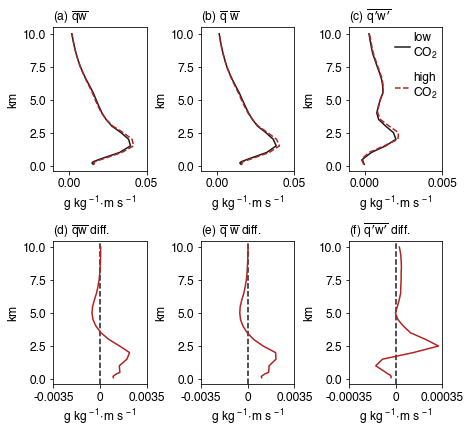

In [45]:
fontsize=12
fig,ax=mp.subplots(ncols=3,nrows=2)
fig.set_size_inches(6.5,6)

ax[0,0].plot(qw_400_time_space_mean, z, c='0.1', label='low CO$_2$')
ax[0,0].plot(qw_1000_time_space_mean, z, c='firebrick', ls='--', label='high CO$_2$')
ax[0,0].tick_params(labelsize=fontsize)
#handles, labels = ax[0,0].get_legend_handles_labels()
#ax[0,0].legend(handles, labels, fontsize=fontsize, scatterpoints=1, ncol=1, bbox_to_anchor=(0.99,0.99), bbox_transform=ax[0,0].transAxes, loc='upper right', borderaxespad=0, labelspacing=0.25, fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, columnspacing=0.5, handletextpad=0.25, markerscale=1)

ax[1,0].axvline(x=0, c='0.1', ls='--')
ax[1,0].plot(qw_diffs_overbar, z, c='firebrick', label='diffs')
ax[1,0].tick_params(labelsize=fontsize)

# =====
ax[0,2].plot(qprime_wprime_400_space_mean, z, c='0.1', label='low\nCO$_2$')
ax[0,2].plot(qprime_wprime_1000_space_mean, z, c='firebrick', ls='--', label='high\nCO$_2$')
ax[0,2].tick_params(labelsize=fontsize)
handles, labels = ax[0,2].get_legend_handles_labels()
ax[0,2].legend(handles, labels, fontsize=fontsize, scatterpoints=1, ncol=1, bbox_to_anchor=(0.98,0.98), \
               bbox_transform=ax[0,2].transAxes, loc='upper right', borderaxespad=0, \
               labelspacing=1, fancybox=False, edgecolor='0', framealpha=0, handlelength=1.25, \
               borderpad=0.25, columnspacing=0.5, handletextpad=0.25, markerscale=1)

ax[1,2].axvline(x=0, c='0.1', ls='--')
ax[1,2].plot(qprime_wprime_diffs_space_mean, z, c='firebrick', label='diffs')
ax[1,2].tick_params(labelsize=fontsize)

# =====
ax[0,1].plot(qbar_wbar_400_space_mean, z, c='0.1', label='low CO$_2$')
ax[0,1].plot(qbar_wbar_1000_space_mean, z, c='firebrick', ls='--', label='high CO$_2$')
ax[0,1].tick_params(labelsize=fontsize)
#handles, labels = ax[0,1].get_legend_handles_labels()
#ax[0,1].legend(handles, labels, fontsize=fontsize, scatterpoints=2, ncol=1, bbox_to_anchor=(0.99,0.99), bbox_transform=ax[0,1].transAxes, loc='upper right', borderaxespad=0, labelspacing=0.25, fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, columnspacing=0.5, handletextpad=0.25, markerscale=1)


ax[1,1].axvline(x=0, c='0.1', ls='--')
ax[1,1].plot(qbar_wbar_diffs_space_mean, z, c='firebrick', label='diffs')
ax[1,1].tick_params(labelsize=fontsize)

ax[0,0].text(s='(a) '+r"$\overline{qw}$", x=0, y=1.01, fontsize=fontsize, ha='left', va='bottom', transform=ax[0,0].transAxes)
ax[0,1].text(s='(b) '+r"$\overline{q} \,\, \overline{w}$", x=0, y=1.01, fontsize=fontsize, ha='left', va='bottom', transform=ax[0,1].transAxes)
ax[0,2].text(s='(c) '+r"$\overline{q \prime w \prime}$", x=0, y=1.01, fontsize=fontsize, ha='left', va='bottom', transform=ax[0,2].transAxes)
ax[1,0].text(s='(d) '+r"$\overline{qw}$"+' diff.', x=0, y=1.01, fontsize=fontsize, ha='left', va='bottom', transform=ax[1,0].transAxes)
ax[1,1].text(s='(e) '+r"$\overline{q} \,\, \overline{w}$"+' diff.', x=0, y=1.01, fontsize=fontsize, ha='left', va='bottom', transform=ax[1,1].transAxes)
ax[1,2].text(s='(f) '+r"$\overline{q \prime w \prime}$"+' diff.', x=0, y=1.01, fontsize=fontsize, ha='left', va='bottom', transform=ax[1,2].transAxes)

ax[0,0].set_xlim(-0.01,0.05)
ax[0,1].set_xlim(-0.01,0.05)
ax[0,2].set_xlim(-0.001,0.005)

ax[1,0].set_xlim(-0.0035,0.0035)
ax[1,1].set_xlim(-0.0035,0.0035)
ax[1,2].set_xlim(-0.00035,0.00035)

ax[1,0].set_xticks([-0.0035,0,0.0035])
ax[1,1].set_xticks([-0.0035,0,0.0035])
ax[1,2].set_xticks([-0.00035,0,0.00035])

ax[1,0].set_xticklabels(['-0.0035','0','0.0035'])
ax[1,1].set_xticklabels(['-0.0035','0','0.0035'])
ax[1,2].set_xticklabels(['-0.00035','0','0.00035'])

# ax[1,0].set_xlabel('diffs in '+r"$\overline{q w}$", fontsize=fontsize)
# ax[1,2].set_xlabel('diffs in '+r"$\overline{q \prime w \prime}$", fontsize=fontsize)
# ax[0,1].set_xlabel(r"$\overline{q \prime w \prime}$", fontsize=fontsize)
# ax[1,1].set_xlabel('diffs in '+r"$\overline{\overline{q} \, \overline{w}}$", fontsize=fontsize)
# ax[0,0].set_xlabel(r"$\overline{q w}$", fontsize=fontsize)
# ax[0,2].set_xlabel(r"$\overline{q \prime w \prime}$", fontsize=fontsize)

ax[0,0].set_ylabel('km', fontsize=fontsize)
ax[1,0].set_ylabel('km', fontsize=fontsize)
ax[0,1].set_ylabel('km', fontsize=fontsize)
ax[1,1].set_ylabel('km', fontsize=fontsize)
ax[0,2].set_ylabel('km', fontsize=fontsize)
ax[1,2].set_ylabel('km', fontsize=fontsize)

ax[0,0].set_xlabel('g kg$^{\,-1}$'+'$\cdot$'+'m s$^{\,-1}$', fontsize=fontsize)
ax[1,0].set_xlabel('g kg$^{\,-1}$'+'$\cdot$'+'m s$^{\,-1}$', fontsize=fontsize)
ax[0,1].set_xlabel('g kg$^{\,-1}$'+'$\cdot$'+'m s$^{\,-1}$', fontsize=fontsize)
ax[1,1].set_xlabel('g kg$^{\,-1}$'+'$\cdot$'+'m s$^{\,-1}$', fontsize=fontsize)
ax[0,2].set_xlabel('g kg$^{\,-1}$'+'$\cdot$'+'m s$^{\,-1}$', fontsize=fontsize)
ax[1,2].set_xlabel('g kg$^{\,-1}$'+'$\cdot$'+'m s$^{\,-1}$', fontsize=fontsize)

#ax[0,0].text(s='km', x=-0.25, y=0.5, transform=ax[0,0].transAxes, ha='center', va='center', rotation=90, fontsize=fontsize)
#ax[1,0].text(s='km', x=-0.25, y=0.5, transform=ax[1,0].transAxes, ha='center', va='center', rotation=90, fontsize=fontsize)

fig.tight_layout(h_pad=2.5, w_pad=0)
fig.subplots_adjust(left=0.1, top=0.95)
mp.show()

fig.savefig('figure8_qw_decomposition.png', dpi=600, bbox_inches='tight', transparent=True)

# now do same calculations for 3hour means

In [46]:
#skip_time = 24
n_intervals = 8
hour_strings = ['00','03','06','09','12','15','18','21']

times_00 = [t.hour in [23,0,1] for t in time_datetimes[skip_time:]]
times_03 = [t.hour in [2,3,4] for t in time_datetimes[skip_time:]]
times_06 = [t.hour in [5,6,7] for t in time_datetimes[skip_time:]]
times_09 = [t.hour in [8,9,10] for t in time_datetimes[skip_time:]]
times_12 = [t.hour in [11,12,13] for t in time_datetimes[skip_time:]]
times_15 = [t.hour in [14,15,16] for t in time_datetimes[skip_time:]]
times_18 = [t.hour in [17,18,19] for t in time_datetimes[skip_time:]]
times_21 = [t.hour in [20,21,22] for t in time_datetimes[skip_time:]]

times_indices_list = [times_00,times_03,times_06,times_09,times_12,times_15,times_18,times_21]

# overbar(qw):  left-hand side

In [53]:
w_400_landmask_region.shape

(241, 26, 45, 89)

In [118]:
# ============================================================================ #

# overbar(qw) = overbar(overbar(q)*overbar(w)) + overbar(qprime*wprime)

### overbar(qw)
qw_400_landmask_3hr_list = [w_400_landmask_region[skip_time:,:,:,:][indices,:,:,:]*\
                            qvapor_400_landmask_region[indices,:,:,:] \
                            for indices in times_indices_list]

qw_1000_landmask_3hr_list = [w_1000_landmask_region[skip_time:,:,:,:][indices,:,:,:]*\
                            qvapor_1000_landmask_region[indices,:,:,:] \
                            for indices in times_indices_list]

qw_400_time_mean_list = [numpy.nanmean(data, axis=0) for data in qw_400_landmask_3hr_list]
qw_1000_time_mean_list = [numpy.nanmean(data, axis=0) for data in qw_1000_landmask_3hr_list]

qw_400_time_space_mean_list = [numpy.nanmean(data, axis=(1,2)) for data in qw_400_time_mean_list]
qw_1000_time_space_mean_list = [numpy.nanmean(data, axis=(1,2)) for data in qw_1000_time_mean_list]

# qw_diffs_overbar = qw_1000_time_space_mean - qw_400_time_space_mean

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: Mean of empty slice
  # This is added back by InteractiveShellApp.init_path()
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  


In [119]:
# ================================================================================
### overbar(q)*overbar(w)
qvapor_400_time_mean_list = [numpy.nanmean(qvapor_400_landmask_region[skip_time:,:,:,:][indices,:,:,:], axis=0) \
                             for indices in times_indices_list]
qvapor_1000_time_mean_list = [numpy.nanmean(qvapor_1000_landmask_region[skip_time:,:,:,:][indices,:,:,:], axis=0) \
                             for indices in times_indices_list]

w_400_time_mean_list = [numpy.nanmean(w_400_landmask_region[skip_time:,:,:,:][indices,:,:,:], axis=0) \
                             for indices in times_indices_list]
w_1000_time_mean_list = [numpy.nanmean(w_1000_landmask_region[skip_time:,:,:,:][indices,:,:,:], axis=0) \
                             for indices in times_indices_list]

qbar_wbar_400_list = [qvapor_400_time_mean_list[i]*w_400_time_mean_list[i] for i in range(n_intervals)]
qbar_wbar_1000_list = [qvapor_1000_time_mean_list[i]*w_1000_time_mean_list[i] for i in range(n_intervals)]

qbar_wbar_400_space_mean_list = [numpy.nanmean(qbar_wbar_400_list[i],axis=(1,2)) for i in range(n_intervals)]
qbar_wbar_1000_space_mean_list = [numpy.nanmean(qbar_wbar_1000_list[i],axis=(1,2)) for i in range(n_intervals)]

qbar_wbar_diffs_list = [qbar_wbar_1000_list[i]-qbar_wbar_400_list[i] for i in range(n_intervals)]
qbar_wbar_diffs_space_mean_list = [numpy.nanmean(qbar_wbar_diffs_list[i],axis=(1,2)) for i in range(n_intervals)]

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


In [138]:
# ================================================================================
### overbar(qprime*wprime)
qprime_400_list = [qvapor_400_landmask_region[skip_time:,:,:,:][times_indices_list[i],:,:,:]-\
                   qvapor_400_time_mean_list[i] for i in range(8)]
qprime_1000_list = [qvapor_1000_landmask_region[skip_time:,:,:,:][times_indices_list[i],:,:,:]-\
                   qvapor_1000_time_mean_list[i] for i in range(8)]

wprime_400_list = [w_400_landmask_region[skip_time:,:,:,:][times_indices_list[i],:,:,:]-\
                   w_400_time_mean_list[i] for i in range(8)]
wprime_1000_list = [w_1000_landmask_region[skip_time:,:,:,:][times_indices_list[i],:,:,:]-\
                   w_1000_time_mean_list[i] for i in range(8)]

qprime_wprime_400_list = [qprime_400_list[i]*wprime_400_list[i] for i in range(8)]
qprime_wprime_1000_list = [qprime_1000_list[i]*wprime_1000_list[i] for i in range(8)]

qprime_wprime_400_time_mean_list = [numpy.nanmean(qprime_wprime_400_list[i], axis=0) for i in range(8)]
qprime_wprime_1000_time_mean_list = [numpy.nanmean(qprime_wprime_1000_list[i], axis=0) for i in range(8)]
qprime_wprime_400_space_mean_list = [numpy.nanmean(qprime_wprime_400_time_mean_list[i], axis=(1,2)) for i in range(8)]
qprime_wprime_1000_space_mean_list = [numpy.nanmean(qprime_wprime_1000_time_mean_list[i], axis=(1,2)) for i in range(8)]

qprime_wprime_diffs_list = [qprime_wprime_1000_time_mean_list[i] - qprime_wprime_400_time_mean_list[i] for i in range(8)]
qprime_wprime_diffs_space_mean_list = [numpy.nanmean(qprime_wprime_diffs_list[i], axis=(1,2)) for i in range(8)]

/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: Mean of empty slice
  
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/Users/baird/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice


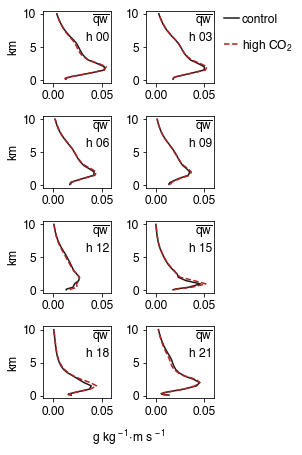

In [160]:
fontsize = 12

fig = mp.figure(figsize=(3,6))

ax_list = []
for i in range(8):
    ax = fig.add_subplot(4,2,i+1)
    ax.plot(qw_400_time_space_mean_list[i],z,color='0.1',label='control')
    ax.plot(qw_1000_time_space_mean_list[i],z,color='firebrick',ls='--',label='high CO$_2$')
    ax.tick_params(labelsize=fontsize)

    ax.set_xlim(-0.01,0.06)
    ax.text(s='h '+hour_strings[i],x=0.97,y=0.7,ha='right',va='top',transform=ax.transAxes,fontsize=fontsize)
    ax.text(s='$\overline{qw}$',x=0.97,y=0.97,ha='right',va='top',transform=ax.transAxes,fontsize=fontsize)
    ax_list.append(ax)
    
handles, labels = ax_list[1].get_legend_handles_labels()
ax_list[1].legend(handles, labels, fontsize=fontsize, scatterpoints=1, ncol=1, bbox_to_anchor=(1.1,1), \
               bbox_transform=ax_list[1].transAxes, loc='upper left', borderaxespad=0, \
               labelspacing=1, fancybox=False, edgecolor='0', framealpha=0, handlelength=1.25, \
               borderpad=0.25, columnspacing=0.5, handletextpad=0.25, markerscale=1)

# units
fig.tight_layout()

ax_pos_left=ax_list[-2].get_position()
ax_pos_right=ax_list[-1].get_position()
xhalf=0.5*(ax_pos_right.x1-ax_pos_left.x0)+ax_pos_left.x0
fig.text(s='g kg$^{\,-1}$'+'$\cdot$'+'m s$^{\,-1}$', x=xhalf, y=0, ha='center', va='top', fontsize=fontsize)

for ax_idx in [0,2,4,6]:
    ax_list[ax_idx].set_ylabel('km', fontsize=fontsize)

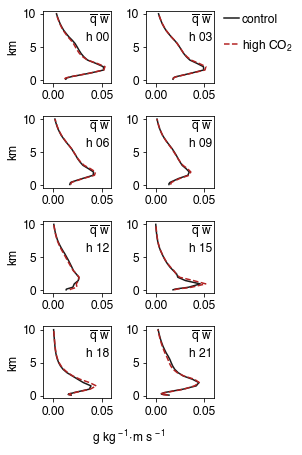

In [159]:
fontsize = 12

fig = mp.figure(figsize=(3,6))

ax_list = []
for i in range(8):
    ax = fig.add_subplot(4,2,i+1)
    ax.plot(qbar_wbar_400_space_mean_list[i],z,color='0.1',label='control')
    ax.plot(qbar_wbar_1000_space_mean_list[i],z,color='firebrick',ls='--',label='high CO$_2$')
    ax.tick_params(labelsize=fontsize)

    ax.set_xlim(-0.01,0.06)
    ax.text(s='h '+hour_strings[i],x=0.97,y=0.7,ha='right',va='top',transform=ax.transAxes,fontsize=fontsize)
    ax.text(s='$\overline{q}\,\,\overline{w}$',x=0.97,y=0.97,ha='right',va='top',transform=ax.transAxes,fontsize=fontsize)
    ax_list.append(ax)
    
handles, labels = ax_list[1].get_legend_handles_labels()
ax_list[1].legend(handles, labels, fontsize=fontsize, scatterpoints=1, ncol=1, bbox_to_anchor=(1.1,1), \
               bbox_transform=ax_list[1].transAxes, loc='upper left', borderaxespad=0, \
               labelspacing=1, fancybox=False, edgecolor='0', framealpha=0, handlelength=1.25, \
               borderpad=0.25, columnspacing=0.5, handletextpad=0.25, markerscale=1)

# units
fig.tight_layout()

ax_pos_left=ax_list[-2].get_position()
ax_pos_right=ax_list[-1].get_position()
xhalf=0.5*(ax_pos_right.x1-ax_pos_left.x0)+ax_pos_left.x0
fig.text(s='g kg$^{\,-1}$'+'$\cdot$'+'m s$^{\,-1}$', x=xhalf, y=0, ha='center', va='top', fontsize=fontsize)

for ax_idx in [0,2,4,6]:
    ax_list[ax_idx].set_ylabel('km', fontsize=fontsize)

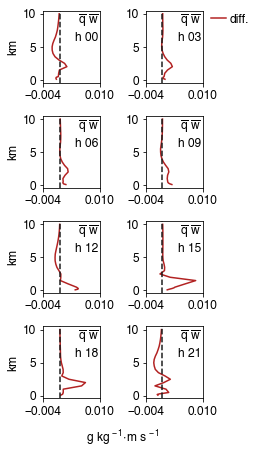

In [148]:
fontsize = 12

fig = mp.figure(figsize=(3,6))

ax_list = []
for i in range(8):
    ax = fig.add_subplot(4,2,i+1)
    ax.plot(qbar_wbar_diffs_space_mean_list[i],z,color='firebrick',label='diff.')
    ax.axvline(x=0,ls='--',color='0.1')
    #ax.plot(qbar_wbar_1000_space_mean_list[i],z,color='firebrick',ls='--',label='high CO$_2$')
    ax.tick_params(labelsize=fontsize)

    ax.set_xlim(-0.004,0.01)
    ax.text(s='h '+hour_strings[i],x=0.97,y=0.7,ha='right',va='top',transform=ax.transAxes,fontsize=fontsize)
    ax.text(s='$\overline{q}\,\,\overline{w}$',x=0.97,y=0.97,ha='right',va='top',transform=ax.transAxes,fontsize=fontsize)
    ax_list.append(ax)
    ax.set_xticks([-0.004,0.01])
    
handles, labels = ax_list[1].get_legend_handles_labels()
ax_list[1].legend(handles, labels, fontsize=fontsize, scatterpoints=1, ncol=1, bbox_to_anchor=(1.1,1), \
               bbox_transform=ax_list[1].transAxes, loc='upper left', borderaxespad=0, \
               labelspacing=1, fancybox=False, edgecolor='0', framealpha=0, handlelength=1.25, \
               borderpad=0.25, columnspacing=0.5, handletextpad=0.25, markerscale=1)

# units
fig.tight_layout()

ax_pos_left=ax_list[-2].get_position()
ax_pos_right=ax_list[-1].get_position()
xhalf=0.5*(ax_pos_right.x1-ax_pos_left.x0)+ax_pos_left.x0
fig.text(s='g kg$^{\,-1}$'+'$\cdot$'+'m s$^{\,-1}$', x=xhalf, y=0, ha='center', va='top', fontsize=fontsize)

for ax_idx in [0,2,4,6]:
    ax_list[ax_idx].set_ylabel('km', fontsize=fontsize)

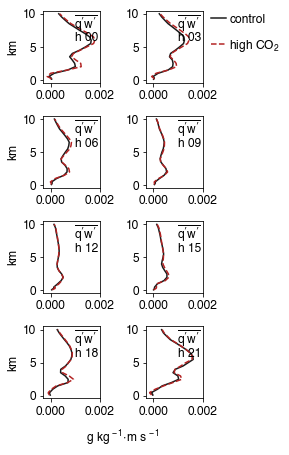

In [149]:
fontsize = 12

fig = mp.figure(figsize=(3,6))

ax_list = []
for i in range(8):
    ax = fig.add_subplot(4,2,i+1)
    ax.plot(qprime_wprime_400_space_mean_list[i],z,color='0.1',label='control')
    ax.plot(qprime_wprime_1000_space_mean_list[i],z,color='firebrick',ls='--',label='high CO$_2$')
    ax.tick_params(labelsize=fontsize)

    ax.set_xlim(-0.0003,0.002)
    ax.text(s='h '+hour_strings[i],x=0.97,y=0.7,ha='right',va='top',transform=ax.transAxes,fontsize=fontsize)
    ax.text(s="$\overline{q'w'}$",x=0.97,y=0.97,ha='right',va='top',transform=ax.transAxes,fontsize=fontsize)
    ax_list.append(ax)
    
handles, labels = ax_list[1].get_legend_handles_labels()
ax_list[1].legend(handles, labels, fontsize=fontsize, scatterpoints=1, ncol=1, bbox_to_anchor=(1.1,1), \
               bbox_transform=ax_list[1].transAxes, loc='upper left', borderaxespad=0, \
               labelspacing=1, fancybox=False, edgecolor='0', framealpha=0, handlelength=1.25, \
               borderpad=0.25, columnspacing=0.5, handletextpad=0.25, markerscale=1)

# units
fig.tight_layout()

ax_pos_left=ax_list[-2].get_position()
ax_pos_right=ax_list[-1].get_position()
xhalf=0.5*(ax_pos_right.x1-ax_pos_left.x0)+ax_pos_left.x0
fig.text(s='g kg$^{\,-1}$'+'$\cdot$'+'m s$^{\,-1}$', x=xhalf, y=0, ha='center', va='top', fontsize=fontsize)

for ax_idx in [0,2,4,6]:
    ax_list[ax_idx].set_ylabel('km', fontsize=fontsize)

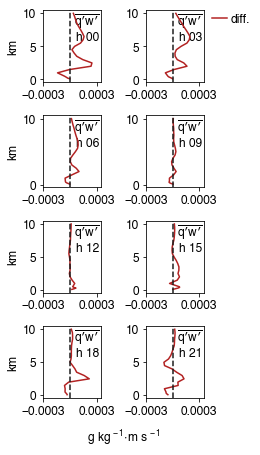

In [158]:
fontsize = 12

fig = mp.figure(figsize=(3,6))

ax_list = []
for i in range(8):
    ax = fig.add_subplot(4,2,i+1)
    ax.plot(qprime_wprime_diffs_space_mean_list[i],z,color='firebrick',label='diff.')
    ax.axvline(x=0,ls='--',color='0.1')
    #ax.plot(qbar_wbar_1000_space_mean_list[i],z,color='firebrick',ls='--',label='high CO$_2$')
    ax.tick_params(labelsize=fontsize)

    ax.set_xlim(-0.0003,0.00035)
    ax.text(s='h '+hour_strings[i],x=0.97,y=0.7,ha='right',va='top',transform=ax.transAxes,fontsize=fontsize,zorder=0)
    ax.text(s='$\overline{q\prime w\prime}$',x=0.97,y=0.97,ha='right',va='top',transform=ax.transAxes,fontsize=fontsize,zorder=0)
    ax_list.append(ax)
    ax.set_xticks([-0.0003,0.0003])
    
handles, labels = ax_list[1].get_legend_handles_labels()
ax_list[1].legend(handles, labels, fontsize=fontsize, scatterpoints=1, ncol=1, bbox_to_anchor=(1.1,1), \
               bbox_transform=ax_list[1].transAxes, loc='upper left', borderaxespad=0, \
               labelspacing=1, fancybox=False, edgecolor='0', framealpha=0, handlelength=1.25, \
               borderpad=0.25, columnspacing=0.5, handletextpad=0.25, markerscale=1)

# units
fig.tight_layout()

ax_pos_left=ax_list[-2].get_position()
ax_pos_right=ax_list[-1].get_position()
xhalf=0.5*(ax_pos_right.x1-ax_pos_left.x0)+ax_pos_left.x0
fig.text(s='g kg$^{\,-1}$'+'$\cdot$'+'m s$^{\,-1}$', x=xhalf, y=-0.001, ha='center', va='top', fontsize=fontsize)

for ax_idx in [0,2,4,6]:
    ax_list[ax_idx].set_ylabel('km', fontsize=fontsize)